In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
dir_list = []
import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        dir_list.append(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session 

./compete.ipynb
./roberta.base.tar.gz
./albert_base_v1.tar.gz
./testcsv.csv
./al(2).pkl
./testcsv_new.csv
./compete-Copy1.ipynb
./compete-Copy2.ipynb
./kkb-repl4nlp-assignment0 (1).zip
./sts-kaggle-sample_submission.csv
./sts-kaggle-test.csv
./sts-kaggle-train.csv
./alFri Jan 15 01:45:20 2021.pkl
./alFri Jan 15 01:47:57 2021.pkl
./compete-Copy_sen_poo.ipynb
./compete-Copy_sen_poo-Copy1.ipynb
./alSat Jan 16 18:56:05 2021.pkl
./alSat Jan 16 19:06:46 2021.pkl
./alSat Jan 16 19:20:19 2021.pkl
./alSat Jan 16 22:19:00 2021.pkl
./alSat Jan 16 22:45:14 2021.pkl
./alSat Jan 16 23:11:36 2021.pkl
./alSat Jan 16 23:29:06 2021.pkl
./Untitled.ipynb
./testcsv__.csv
./compete.py
./alFri Jan 22 23:01:18 2021.pkl
./compete-Copy_sen_poo-Copy2.ipynb
./sts-kaggle-solution.csv
./alSat Jan 23 16:17:06 2021.pkl
./alSat Jan 23 16:29:57 2021.pkl
./alSat Jan 23 16:45:59 2021.pkl
./alThu Jan 28 12:57:03 2021.pkl
./alThu Jan 28 12:58:18 2021.pkl
./alThu Jan 28 12:59:45 2021.pkl
./alThu Jan 28 13:45:02 2021.pkl
./a

In [3]:
#from transformers import AlbertTokenizer, AlbertModel,AlbertConfig
from transformers import BertTokenizer, BertModel,BertConfig
import torch
from torch.utils.data import DataLoader,Dataset
from torch.nn.utils.rnn import pad_sequence
from torch.optim import Adam
from tqdm import tqdm
from torch.nn import CrossEntropyLoss,MSELoss

In [4]:
#! unzip 'kkb-repl4nlp-assignment0 (1).zip'

In [5]:
import sys
sys.path

['/home/bool_tbb/jupyter_notebook/kaggle',
 '/home/bool_tbb/miniconda3/envs/pytorch/lib/python38.zip',
 '/home/bool_tbb/miniconda3/envs/pytorch/lib/python3.8',
 '/home/bool_tbb/miniconda3/envs/pytorch/lib/python3.8/lib-dynload',
 '',
 '/home/bool_tbb/miniconda3/envs/pytorch/lib/python3.8/site-packages',
 '/home/bool_tbb/miniconda3/envs/pytorch/lib/python3.8/site-packages/IPython/extensions',
 '/tmp/tmp35ke5epu']

In [6]:
df = pd.read_csv("./sts-kaggle-train.csv")

In [7]:
df.tail(50)

,id,sentence_a,sentence_b,similarity
5699,5699,the treaty was first signed in 1990.,the cfe treaty was signed in 1990.,4.200
5700,5700,Woman in a black dress walking on the street.,A woman watches a dog jump down the stairs.,0.800
5701,5701,A blue bird perches on the gloved hand of a pe...,A bird is perched on a person's gloved hand.,4.200
5702,5702,China yuan strengthens to 6.2689 against USD,Chinese yuan weakens to 6.2816 against USD,3.000
5703,5703,Egypt court orders Mubarak release,Egypt court turns down Mubarak's release request,2.000
5704,5704,Syria Regime Agrees to Attend Peace Conference,Russia: Syria Agrees to Participate in Conference,4.800
5705,5705,Chief merchandising officers oversee the buyin...,He or she decides the merchandising direction ...,3.200
5706,5706,Dusty had battled kidney cancer for more than ...,Dusty had surgery for cancer in 2001 and had a...,2.400
5707,5707,Nadal tops Djokovic for 7th French Open title,Tennis: Nadal defeats Djokovic for Monte Carlo...,3.200
5708,5708,The onus is on the manufacturer of a product t...,The manufacturer has to convince the governmen...,3.400


In [15]:
df['similarity'] = df['similarity']/5

In [51]:
data=df.values.tolist()

In [52]:
lst = [0 for i in range(6)]
for i in data:
    lst[round(i[3])]+=1

In [44]:
#lst

In [49]:
def read_data(dataframe):
    lst = []
    count = [0 for i in range(6)]
    for index, row in df.iterrows():
        #print(index)
        #print(row['sentence_a'])
        #if count[round(row['similarity'])]<600:
            #count[round(row['similarity'])]+=1
        if row['similarity']>4:
            lst.append((row['sentence_a'],row['sentence_b'],row['similarity']))
    #dials = []
    #for l in lines:
    #    if l == '<dial>':
    #        dial = []
    #    elif l == '</dial>':
    #        dials += [dial]
    #    else:
    #        dial += [l.strip()]
    return lst

In [50]:
lst=read_data(df)

In [51]:
print(len(lst))

1052


In [11]:
lst[1]

('A black, brown and white dog running through a field.',
 'A white and brown dog runs in a field.',
 2.83)

In [12]:
class InputFeature(object):
    def __init__(self,input_ids,position_ids,token_type_ids,
                lm_labels=None,input_len=None):
        
        self.input_ids = input_ids
        self.position_ids = position_ids
        self.token_type_ids = token_type_ids
        self.lm_labels =lm_labels
        if input_len is None:
            self.input_len = len(input_ids)
        else:
            self.input_len = input_len

In [29]:
class AlBertDataset(Dataset):
    
    def __init__(self,sentence_lst,max_len = 512):
        self.max_len = max_lena
        self.features = AlBertDataset.build_input_feature(sentence_lst)
    
    def __getitem__(self,i):
        feat_dict = self.features[i]
        if self.max_len is not None and feat_dict['input_len'] > self.max_len:
            feat_dict['input_ids'] = feat_dict['input_dis'][-self.max_len:]
            feat_dict['position_ids'] = feat_dict['position_ids'][-self.max_len:]
            feat_dict['token_type_ids'] = feat_dict['token_type_ids'][-self.max_len:]
            #feat_dict['lm_labels'] = feat_dict['lm_labels'][-self.max_len:]
        feat = InputFeature(**feat_dict)
        return feat
    
    def __len__(self):
        return len(self.features)
    
    @staticmethod
    def build_input_feature(sentence_lst,begin_text= '[CLS]',sep_text="[SEP]"):
        #tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
        tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
        feature = []
        for data in sentence_lst:
            inputs_sentence1 = data[0]
            inputs_sentence2 = data[1]
            inputs_1,inputs_2 = tokenizer.encode(inputs_sentence1),tokenizer.encode(inputs_sentence2)
            len_inputs_1,len_inputs_2 = len(inputs_1), len(inputs_2)
            lm_labels = data[2]
            token_type_ids1 = [0] * len_inputs_1
            token_type_ids2 = [0] * len_inputs_2
            position_ids1 = list(range(len(inputs_1)))
            position_ids2 = list(range(len(inputs_2)))
            feat_dict = {'input_ids':[inputs_1,inputs_2],
                        'position_ids':[position_ids1,position_ids2],
                        'token_type_ids':[token_type_ids1,token_type_ids2],
                        'lm_labels':lm_labels,
                        'input_len':[len_inputs_1,len_inputs_2]}
            feature.append(feat_dict)
        return feature
    
    @staticmethod
    def collate(features):
        inputs_ids_0 = pad_sequence([torch.tensor(f['input_ids'][0],dtype=torch.long)
                                  for f in features],batch_first=True,padding_value=0)
        inputs_ids_1 = pad_sequence([torch.tensor(f['input_ids'][1],dtype=torch.long)
                                  for f in features],batch_first=True,padding_value=0)
        
        position_ids_0 = pad_sequence([torch.tensor(f['position_ids'][0],dtype=torch.long)
                                   for f in features],batch_first=True,padding_value=0)
        position_ids_1 = pad_sequence([torch.tensor(f['position_ids'][1],dtype=torch.long)
                                   for f in features],batch_first=True,padding_value=0)
        
        token_type_ids_0 = pad_sequence([torch.tensor(f['token_type_ids'][0],dtype=torch.long)
                                      for f in features],batch_first=True,padding_value=0)
        
        token_type_ids_1 = pad_sequence([torch.tensor(f['token_type_ids'][1],dtype=torch.long)
                                      for f in features],batch_first=True,padding_value=0)
        
        labels = torch.tensor([torch.tensor(f['lm_labels'],dtype=torch.float32) for f in features])
        
        return ((inputs_ids_0,inputs_ids_1),(position_ids_0,position_ids_1),(token_type_ids_0,token_type_ids_1),labels)

In [53]:
dataset= AlBertDataset.build_input_feature(lst)

In [54]:
loader = DataLoader(dataset,collate_fn=AlBertDataset.collate,batch_size=50)

In [16]:
i=0
for s in loader:
    print("*"*10)
    print("*"*10)
    print("*"*10)
    print(s[0][0])
    print(s[0][1])
    print(s[1][0])
    print(s[1][1])
    print(s[2][0])
    print(s[2][1])
    print(s[3])
    print("*"*10)
    print("*"*10)
    print("*"*10)
    i+=1
    if i>3:
        break

**********
**********
**********
tensor([[  101,   143, 12788,  ...,     0,     0,     0],
        [  101,   143,  9296,  ...,     0,     0,     0],
        [  101,  8256, 12797,  ...,     0,     0,     0],
        ...,
        [  101,   147,  8207,  ...,     0,     0,     0],
        [  101,  9245,  8228,  ...,     0,     0,     0],
        [  101, 13048, 12288,  ...,     0,     0,     0]])
tensor([[  101,   143, 12788,  ...,     0,     0,     0],
        [  101,   143,  9790,  ...,     0,     0,     0],
        [  101, 10166, 10158,  ...,     0,     0,     0],
        ...,
        [  101,   147,  8207,  ...,     0,     0,     0],
        [  101,  9796,  8415,  ...,     0,     0,     0],
        [  101, 13048, 12288,  ...,     0,     0,     0]])
tensor([[0, 1, 2,  ..., 0, 0, 0],
        [0, 1, 2,  ..., 0, 0, 0],
        [0, 1, 2,  ..., 0, 0, 0],
        ...,
        [0, 1, 2,  ..., 0, 0, 0],
        [0, 1, 2,  ..., 0, 0, 0],
        [0, 1, 2,  ..., 0, 0, 0]])
tensor([[0, 1, 2,  ..., 0

In [61]:
tokenizer.decode(torch.tensor([21]))

'a'

In [83]:
x = torch.tensor([1, 2, 3])
print(x.size())
print(x.repeat(1,2,3))
x.repeat(1,2,3).size()

torch.Size([3])
tensor([[[1, 2, 3, 1, 2, 3, 1, 2, 3],
         [1, 2, 3, 1, 2, 3, 1, 2, 3]]])


torch.Size([1, 2, 9])

In [86]:
x=torch.arange(15).view(5,3).float()
x=x.repeat(3,1,1)
x_mean=torch.mean(x,dim=0,keepdim=True)
x_mean0=torch.mean(x,dim=2,keepdim=True)
print('before bn:')
print(x)
print('x_mean:')
print(x_mean)
print('x_mean0:')
print(x_mean0) 

before bn:
tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.],
         [12., 13., 14.]],

        [[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.],
         [12., 13., 14.]],

        [[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.],
         [12., 13., 14.]]])
x_mean:
tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.],
         [12., 13., 14.]]])
x_mean0:
tensor([[[ 1.],
         [ 4.],
         [ 7.],
         [10.],
         [13.]],

        [[ 1.],
         [ 4.],
         [ 7.],
         [10.],
         [13.]],

        [[ 1.],
         [ 4.],
         [ 7.],
         [10.],
         [13.]]])


In [36]:
m = nn.Sigmoid()
input = torch.arange(10).float().reshape(1,10)
m(input)

tensor([[0.5000, 0.7311, 0.8808, 0.9526, 0.9820, 0.9933, 0.9975, 0.9991, 0.9997,
         0.9999]])

In [21]:
class Conv1d(torch.nn.Module):
    def __init__(self, in_channels, out_channels, filter_sizes):
        super(Conv1d, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=in_channels,
                      out_channels=out_channels,
                      kernel_size=fs)
            for fs in filter_sizes
        ])

        self.init_params()

    def init_params(self):
        for m in self.convs:
            nn.init.xavier_uniform_(m.weight.data)
            nn.init.constant_(m.bias.data, 0.1)

    def forward(self, x):
        return [F.relu(conv(x)) for conv in self.convs]

In [32]:
#old
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.trans=BertModel.from_pretrained("bert-base-uncased")
        #self.trans=AlbertModel.from_pretrained('albert-base-v2')
        for p in self.parameters():
            p.requires_grad = False
        self.norm = nn.LayerNorm(768*2)
        self.fc = nn.Linear(768*2, 50)
        self.tanh = nn.ReLU()
        self.fc2  = nn.Linear(50,1)
        #self.sig = nn.Sigmoid()
    def forward(self, input_ids=None, token_type_ids=None, position_ids=None,device='cpu'):
        if token_type_ids !=None:
            x_0 = self.trans(input_ids=input_ids[0].to(device), token_type_ids=token_type_ids[0].to(device),position_ids=position_ids[0].to(device))
        else:
            x_0 = self.trans(input_ids=input_ids[0].to(device))
        
            
        x_0= torch.mean(x_0[0],dim=1,keepdim=True).squeeze_(1)
        #print(x.size())
        #x_0 = self.tanh(self.fc(x_0))
        if token_type_ids !=None:
            x_1 = self.trans(input_ids=input_ids[1].to(device), token_type_ids=token_type_ids[1].to(device),position_ids=position_ids[1].to(device))
        else:
            x_1 = self.trans(input_ids=input_ids[1].to(device))
        x_1= torch.mean(x_1[0],dim=1,keepdim=True).squeeze_(1)
        #print(x.size())
        #x_1 = self.tanh(self.fc(x_1))
        x = self.norm(torch.cat((x_0,x_1),dim=1))
        x = self.tanh(self.fc(x))
        x =self.fc2(x)
        return x

net = Net()

In [18]:
#old
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.trans=AlbertModel.from_pretrained('albert-base-v2')
        for p in self.parameters():
            p.requires_grad = True
        self.norm = nn.LayerNorm(768*2)
        self.fc = nn.Linear(768*2, 50)
        self.tanh = nn.ReLU()
        self.fc2  = nn.Linear(50,1)
        #self.sig = nn.Sigmoid()
    def forward(self, input_ids=None, token_type_ids=None, position_ids=None,device='cpu'):
        if token_type_ids !=None:
            x_0 = self.trans(input_ids=input_ids[0].cuda(), token_type_ids=token_type_ids[0].cuda(),position_ids=position_ids[0].cuda())
        else:
            x_0 = self.trans(input_ids=input_ids[0].cuda())
        
            
        x_0= torch.mean(x_0[0],dim=1,keepdim=True).squeeze_(1)
        #print(x.size())
        #x_0 = self.tanh(self.fc(x_0))
        if token_type_ids !=None:
            x_1 = self.trans(input_ids=input_ids[1].cuda(), token_type_ids=token_type_ids[1].cuda(),position_ids=position_ids[1].cuda())
        else:
            x_1 = self.trans(input_ids=input_ids[1].cuda())
        x_1= torch.mean(x_1[0],dim=1,keepdim=True).squeeze_(1)
        #print(x.size())
        #x_1 = self.tanh(self.fc(x_1))
        x = self.norm(torch.cat((x_0,x_1),dim=1))
        x = self.tanh(self.fc(x))
        x =self.fc2(x).squeeze_(1)
        return x

net = Net()

NameError: name 'AlbertModel' is not defined

In [145]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        total_filter_sizes = "2 2 3 3 4 4 5 5 6 6 7 7"
        filter_sizes = [int(val) for val in total_filter_sizes.split()]
        n_filters = 30
        self.trans=AlbertModel.from_pretrained('albert-base-v2')
        self.convs = Conv1d(768, n_filters, filter_sizes)
        for p in self.parameters():
            p.requires_grad = False
        self.dropout = nn.Dropout(0.05)
        self.norm = nn.LayerNorm(768)
        self.fc = nn.Linear(len(filter_sizes) * n_filters*2, 256)
        self.rel = nn.ReLU()
        self.fc2 = nn.Linear(256, 128)
        self.tanh = nn.Tanh()
        self.fc3  = nn.Linear(128,64)
        self.Sig = nn.Sigmoid()
        self.fc4  = nn.Linear(64,32)
        self.Sig2 = nn.Sigmoid()
        self.fc5  = nn.Linear(32,1)
        
        #self.sig = nn.Sigmoid()
    def forward(self, input_ids=None, token_type_ids=None, position_ids=None,device='cpu'):
        if token_type_ids !=None:
            x_0 = self.trans(input_ids=input_ids[0].to(device), token_type_ids=token_type_ids[0].to(device),position_ids=position_ids[0].to(device))
        else:
            x_0 = self.trans(input_ids=input_ids[0].to(device))
        #x= self.norm(torch.mean(x[0],dim=1,keepdim=True)).squeeze_(1)
        
        x_0=x_0[0].permute(0,2,1)
        conved_0 = self.convs(x_0)
        
        pooled_0 = [F.max_pool1d(conv,conv.shape[2]).squeeze(2)
                  for conv in conved_0]
        cat_0 = self.dropout(torch.cat(pooled_0, dim=1))
        #print(x.size())
        if token_type_ids !=None:
            x_1 = self.trans(input_ids=input_ids[1].to(device), token_type_ids=token_type_ids[1].to(device),position_ids=position_ids[1].to(device))
        else:
            x_1 = self.trans(input_ids=input_ids[1].to(device))
        #x= self.norm(torch.mean(x[0],dim=1,keepdim=True)).squeeze_(1)
        
        x_1=x_1[0].permute(0,2,1)
        conved_1 = self.convs(x_1)
        
        pooled_1 = [F.max_pool1d(conv,conv.shape[2]).squeeze(2)
                  for conv in conved_1]
        cat_1 = self.dropout(torch.cat(pooled_1, dim=1))
        
        x = torch.cat((cat_0,cat_1),dim=1)
        x = self.rel(self.fc(x))
        x = self.tanh(self.fc2(x))
        x = self.Sig(self.fc3(x))
        x = self.Sig2(self.fc4(x))
        x = self.fc5(x)
        return x


net = Net()

In [16]:
for s in loader:
    input_ids,position_ids,token_type_ids,label_ids = s
    #print(label_ids)
    break
    

<ipython-input-12-34eea96b6644>:51: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  token_type_ids = pad_sequence([torch.tensor(f['token_type_ids'],dtype=torch.long)


In [25]:
net

Net(
  (trans): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (

In [32]:
m=CrossEntropyLoss(reduction='mean')

In [17]:
s=net(input_ids=input_ids,position_ids=position_ids,token_type_ids=token_type_ids)

In [63]:
model=AlbertModel.from_pretrained('albert-base-v2')

In [64]:
s=model(input_ids=input_ids,position_ids=position_ids,token_type_ids=token_type_ids)

In [18]:
print(s.size())

torch.Size([1, 6])


In [40]:
label_ids

tensor([4])

In [29]:
s.size()

torch.Size([100, 6])

In [41]:
m(s,label_ids)

tensor(1.7763, grad_fn=<NllLossBackward>)

In [98]:
m =MSELoss()

In [107]:
m(torch.tensor([[2],[2],[2]],dtype=torch.float32),torch.tensor([[2],[2],[2]],dtype=torch.float32))

tensor(0.)

In [ ]:
#forward(input_ids=None, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, output_attentions=None, output_hidden_states=None, return_dict=None)

In [33]:
loss_lst=[]
def run(model,train_dataloader,learning_rate,epoches):
    model.to(device)
    #ngpu=3
    #if (device.type == 'cuda') and (ngpu > 1):
    #    model = nn.DataParallel(model, list(range(ngpu)))
    optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=learning_rate)
    running_loss = 0 
    step = 0
    epoch = 0 
    back=5
    pbar = tqdm(enumerate(train_dataloader),total=len(train_dataloader))
    loss_function  = MSELoss(reduction='mean')
    bckcount=0
    while epoch < epoches:
        
        try:
            with tqdm(enumerate(train_dataloader),total=len(train_dataloader)) as pbar:
                for i,batch in pbar:
                    input_ids,position_ids,token_type_ids,label_ids = batch
                    logits = model(input_ids=input_ids,position_ids=position_ids,token_type_ids=token_type_ids,device=device)
                    #print(type(input_ids))
                    #(logits.size())
                    #print(label_ids)
                    loss = loss_function(logits.to(device),label_ids.to(device))
                    #print("UEsss")
                    #break
                    #print(i)
                    if i%100==0:
                        loss_lst.append(loss.detach())#计算图需要detach掉
                        #break
                    running_loss += loss.item()
                    pbar.set_description('Train (Epoch{}):{:.4f}'.format(epoch,running_loss/(step+1)))
                    #bckcount+=1
                    #if bckcount>=5:
                        #bckcount=0
                    loss.backward()
                    optimizer.step() # w = w +dw
                    optimizer.zero_grad()# dw = 0
                    step += 1
                epoch += 1
        except KeyboardInterrupt:
            pbar.close()
            raise
        pbar.close()
    import time
    localtime = str(time.asctime( time.localtime(time.time()) ))
    with open('al{}.pkl'.format(localtime),'wb') as f:        
        
        torch.save({'model':model.state_dict(),
               'epoch':epoch},f)

In [41]:
loss_lst=[]
def run(model,train_dataloader,learning_rate,epoches):
    model.to("cuda:0")
    ngpu=3
    if (device.type == 'cuda') and (ngpu > 1):
        model = nn.DataParallel(model, list(range(ngpu)))
    optimizer = Adam(filter(lambda p: p.requires_grad, model.parameters()),lr=learning_rate)
    running_loss = 0 
    step = 0
    epoch = 0 
    back=5
    pbar = tqdm(enumerate(train_dataloader),total=len(train_dataloader))
    loss_function  = MSELoss(reduction='mean')
    bckcount=0
    while epoch < epoches:
        
        try:
            with tqdm(enumerate(train_dataloader),total=len(train_dataloader)) as pbar:
                for i,batch in pbar:
                    input_ids,position_ids,token_type_ids,label_ids = batch
                    logits = model(input_ids=input_ids,position_ids=position_ids,token_type_ids=token_type_ids,device=device)
                    #print(type(input_ids))
                    #(logits.size())
                    #print(label_ids)
                    loss = loss_function(logits.cuda(),label_ids.cuda())
                    #print("UEsss")
                    #break
                    #print(i)
                    if i%100==0:
                        loss_lst.append(loss.item())
                        #break
                    running_loss += loss.item()
                    pbar.set_description('Train (Epoch{}):{:.4f}'.format(epoch,running_loss/(step+1)))
                    #bckcount+=1
                    #if bckcount>=5:
                    #bckcount=0
                    loss.backward()
                    optimizer.step() # w = w +dw
                    optimizer.zero_grad()# dw = 0
                    step += 1
                epoch += 1
        except KeyboardInterrupt:
            pbar.close()
            raise
        pbar.close()
    import time
    localtime = str(time.asctime( time.localtime(time.time()) ))
    with open('al{}.pkl'.format(localtime),'wb') as f:        
        
        torch.save({'model':model.state_dict(),
               'epoch':epoch},f)

In [19]:
dic=torch.load("./alTue Feb  2 00:18:37 2021.pkl")

In [20]:
dic['epoch']

50

In [21]:
net.load_state_dict(dic['model'])

<All keys matched successfully>

In [148]:
for p in net.parameters():
    p.requires_grad = True

In [17]:
ngpu=3
if (device.type == 'cuda') and (ngpu > 1):
    netP = nn.DataParallel(net, list(range(ngpu)))


In [55]:
run(net,loader,5e-5,50)

  0%|          | 0/22 [00:00<?, ?it/s]
/home/bool_tbb/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([50, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Train (Epoch0):1.5287:  95%|█████████▌| 21/22 [00:01<00:00, 11.72it/s]/home/bool_tbb/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Train (Epoch49):0.1248: 100%|██████████| 22/22 [00:01<00:00, 11.94it/s]


In [56]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'cost')

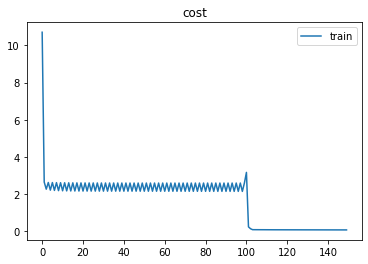

In [57]:
plt.plot(range(len(loss_lst)), loss_lst)
plt.legend(["train"])
plt.title("cost")

In [37]:
import torch
flag = torch.cuda.is_available()
if flag:
    print("CUDA可使用")
else:
    print("CUDA不可用")

ngpu= 1
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
print("驱动为：",device)
print("GPU型号： ",torch.cuda.get_device_name(0))


CUDA可使用
驱动为： cuda:0
GPU型号：  GeForce RTX 2080 Ti


In [54]:
#albert_base_configuration = AlbertConfig(hidden_size=768,num_attention_heads=12,intermediate_size=3072,)
#model = AlbertModel(albert_base_configuration)

In [33]:
net.eval()

Net(
  (trans): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (

In [180]:
net(torch.tensor(tokenizer.encode("[CLS] Mr. Bankhead said the crime scenes indicated that the killer was very methodical. [SEP] GBI spokesman John Bankhead said the murder scenes showed that the killer was very methodical.")).unsqueeze_(0).to('cuda')).item()

0.49642884731292725

In [46]:
df2 = pd.read_csv("./sts-kaggle-train.csv")
lst_test=[]
lst_df= df2.values.tolist()


In [47]:
lst_df

[[0,
  'A kitten is playing with a blue rope toy.',
  'A kitten is playing with a toy.',
  4.4],
 [1,
  'A black, brown and white dog running through a field.',
  'A white and brown dog runs in a field.',
  2.83],
 [2,
  'And Nugent was a complete fool to say what he said.',
  'Natalie was a complete fool to have insulted their fan base.',
  0.6],
 [3,
  'elbaradei is the international atomic energy agency chief. ',
  "mohammed elbarade is the international atomic energy agency's director general.",
  4.8],
 [4,
  'A woman is seasoning a piece of meat.',
  'A man is loading a rifle with bullets.',
  0.0],
 [5,
  'China yuan weakens to 6.1535 against USD',
  'China yuan strengthens to new high against USD',
  2.0],
 [6,
  'russian officials have called for a conference on the conventional forces in europe treaty to discuss ratification of the amended treaty. ',
  'antonov spoke the day before a conference on the conventional forces in europe treaty.',
  3.2],
 [7,
  'A black and white c

In [40]:
#tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [41]:
device

device(type='cuda', index=0)

In [58]:
lst_test=[]
net.to(device)
for i,s in enumerate(lst_df):
    sen1= s[1]
    sen2 = s[2]
    sentence = (sen1,sen2)
    sen1_encode=torch.tensor(tokenizer.encode(sen1))
    sen2_encode = torch.tensor(tokenizer.encode(sen2))
    #print(sen1_encode)
    #print(sen2_encode)
    score = net((sen1_encode.unsqueeze_(0),sen2_encode.unsqueeze_(0)),device=device).detach()
    #score = score.topk(1)
    #print(score[1].item())
    #if i==100:
    #    break
    lst_test.append((i,score.item()))
    print(score.item())

4.121481418609619
4.32151460647583
4.470576763153076
4.24993371963501
4.154343605041504
4.3001508712768555
4.558889865875244
4.263054847717285
4.40784215927124
4.10369873046875
4.372326850891113
3.9921720027923584
4.416764259338379
4.036351680755615
4.245327472686768
4.071748733520508
4.18180513381958
4.002620697021484
4.48451042175293
4.561853408813477
3.884089946746826
4.144852161407471
4.05928897857666
4.069827556610107
4.155930995941162
3.9799468517303467
4.288381099700928
3.8418736457824707
4.209661483764648
4.075987339019775
4.220874309539795
4.169846057891846
4.1954216957092285
4.095168113708496
4.042322158813477
4.1349568367004395
3.934278726577759
4.483966827392578
4.278048992156982
4.250738620758057
4.05103874206543
4.246696949005127
3.944607973098755
4.417430400848389
4.069098472595215
4.217304229736328
4.582786560058594
4.344934940338135
4.340805530548096
4.290131092071533
4.397162914276123
4.29245138168335
4.2164130210876465
4.15675687789917
4.060092449188232
3.96944689750

4.146004676818848
4.256831169128418
3.82855486869812
3.8988234996795654
3.7756662368774414
4.150508403778076
4.197022438049316
3.802062511444092
3.874727725982666
3.8270347118377686
4.406904697418213
4.377259731292725
4.190151691436768
4.055363178253174
4.563612461090088
4.018784999847412
4.197534561157227
4.073673725128174
4.575549602508545
3.9233601093292236
4.27483606338501
4.327986240386963
3.93652606010437
4.570267677307129
4.410173416137695
4.238802433013916
4.2432098388671875
3.9848010540008545
4.2295050621032715
4.41333532333374
4.123651504516602
4.188390254974365
3.993046522140503
4.20308780670166
4.0901970863342285
4.55077600479126
4.008852005004883
4.253215789794922
4.025219917297363
3.8311784267425537
4.832202434539795
4.1473870277404785
4.191492080688477
4.517718315124512
4.155040264129639
3.5426011085510254
3.8863725662231445
4.55648136138916
4.214827060699463
3.992950201034546
4.105967998504639
4.092000484466553
3.8024468421936035
4.877470016479492
4.377237796783447
4.07

4.149444103240967
4.412190914154053
4.193161964416504
3.9914042949676514
3.90173077583313
4.305287837982178
4.437102794647217
4.678621292114258
4.847390651702881
4.0457940101623535
4.134561061859131
4.156746864318848
4.089323997497559
4.221609115600586
3.6616358757019043
4.332065582275391
4.089123249053955
3.9278805255889893
4.096354007720947
4.8770012855529785
4.443551540374756
4.342480659484863
4.261100769042969
4.333521366119385
4.325117588043213
4.21692419052124
4.162017345428467
4.375965118408203
4.183620452880859
4.118032932281494
4.187755107879639
4.4290266036987305
4.195384502410889
4.128063678741455
4.156083583831787
4.22029972076416
3.9537932872772217
4.313587188720703
4.113014221191406
4.32883882522583
4.1915764808654785
4.283926486968994
4.005480766296387
4.1130475997924805
3.908679723739624
4.21929407119751
4.467216491699219
3.855706214904785
4.126652240753174
4.169130802154541
4.146139621734619
4.0452880859375
4.254031181335449
3.9649159908294678
3.9994304180145264
4.3103

4.07371187210083
4.105282306671143
4.110714912414551
4.612506866455078
4.19048547744751
4.502358436584473
4.2745442390441895
4.175142288208008
4.178621768951416
4.0200676918029785
4.472238063812256
3.455404043197632
3.99501633644104
4.1778059005737305
4.014479637145996
4.256453037261963
4.422616004943848
4.479203224182129
4.132557392120361
4.7247138023376465
4.280306339263916
4.383166790008545
4.018817901611328
4.564823627471924
4.633327007293701
4.287755966186523
4.296322345733643
4.505143642425537
4.358186721801758
3.937361478805542
4.3522562980651855
4.181015968322754
4.067120552062988
4.231256008148193
3.9339053630828857
3.9432313442230225
4.685189247131348
4.204741477966309
4.230057716369629
4.550967216491699
4.2203192710876465
4.128088474273682
4.505158424377441
3.798788547515869
4.345621585845947
3.910118818283081
4.361326217651367
4.427025318145752
4.372419834136963
4.15106725692749
4.06669282913208
4.15415620803833
4.0273590087890625
4.131202697753906
4.310337066650391
4.05455

4.231173515319824
4.111499786376953
4.1735944747924805
4.124462127685547
4.010400772094727
3.637218952178955
4.08012580871582
4.4177327156066895
3.9081146717071533
4.617894172668457
4.3400444984436035
4.097287654876709
4.057229042053223
3.993339776992798
4.352604389190674
4.337507247924805
4.324566841125488
4.368203163146973
4.324591636657715
4.154513835906982
4.201504707336426
4.456002712249756
4.243782997131348
4.257770538330078
4.417455673217773
4.205780029296875
4.120920181274414
4.280340194702148
4.227733135223389
3.966830015182495
4.521843910217285
4.163412570953369
4.110977649688721
3.999347448348999
4.166136741638184
4.362980842590332
3.7803049087524414
4.047092437744141
4.832231521606445
3.9098894596099854
4.233646869659424
3.96645188331604
4.100737571716309
4.000579833984375
4.643126487731934
4.3826727867126465
3.4664461612701416
4.079244613647461
4.204960346221924
3.8823137283325195
4.1663970947265625
4.015261650085449
4.227590560913086
4.565668106079102
4.1588029861450195
4

4.0297393798828125
4.188194274902344
4.099891185760498
4.268477916717529
4.275240421295166
4.444929122924805
4.627974510192871
4.530639171600342
4.341529369354248
4.329217910766602
4.161283016204834
4.404836654663086
4.238096237182617
4.601216793060303
4.351918697357178
4.1778340339660645
4.434004306793213
4.387649059295654
4.398563385009766
4.047265529632568
4.07171106338501
4.618253707885742
3.89933705329895
4.639033794403076
4.490034580230713
4.206015586853027
4.528681755065918
4.542397499084473
4.0182881355285645
3.8594703674316406
4.119854927062988
4.196019649505615
4.219369411468506
4.246025562286377
4.31831169128418
4.271545886993408
4.17038631439209
4.313457012176514
4.246328830718994
4.025298118591309
3.6863842010498047
4.671456813812256
4.138658046722412
4.083200454711914
3.655644655227661
4.407827377319336
4.371643543243408
4.012454509735107
3.915285348892212
4.152726173400879
4.104269504547119
4.025074481964111
4.355478763580322
4.0789313316345215
4.128429889678955
4.290143

4.26146125793457
4.278164386749268
3.642577648162842
4.433989524841309
4.308868885040283
4.448841094970703
4.151914119720459
4.062061309814453
4.175207138061523
4.172097206115723
4.076994895935059
4.2897186279296875
4.188892841339111
3.9718639850616455
4.5115509033203125
4.23999547958374
4.62131404876709
4.099406719207764
4.165322780609131
4.564985752105713
3.7740399837493896
4.44148063659668
4.462287902832031
4.555209636688232
4.427135944366455
4.30484676361084
4.450160026550293
4.368481159210205
4.177671909332275
3.830475091934204
4.244942665100098
4.106344223022461
4.2240166664123535
4.048730373382568
4.22285270690918
3.8636977672576904
4.271955966949463
3.979417562484741
4.3575053215026855
4.257330417633057
4.509165287017822
4.252652168273926
4.413217067718506
4.240408897399902
4.179939270019531
4.284229278564453
3.6912729740142822
4.226414680480957
4.206453323364258
4.339606761932373
4.232134819030762
4.297909259796143
4.321554660797119
3.843499183654785
4.253182888031006
4.481920

4.356395721435547
4.294789791107178
4.096765518188477
4.2400970458984375
4.304952621459961
3.913086175918579
4.585458278656006
4.248393535614014
4.287106037139893
4.03312873840332
4.452176094055176
3.962512254714966
4.430898189544678
4.659104347229004
4.37204647064209
4.393296718597412
4.1015305519104
4.438697814941406
4.227798938751221
4.233209133148193
4.165179252624512
4.180174827575684
4.182011127471924
3.913755178451538
4.19036865234375
3.9098103046417236
3.8382718563079834
4.501971244812012
3.874778985977173
4.024065971374512
4.084811210632324
3.995504140853882
4.280129909515381
4.655817985534668
4.217806339263916
4.513314247131348
4.510459899902344
4.316111087799072
4.21479606628418
4.1054229736328125
4.143584728240967
3.9861972332000732
4.221673965454102
4.095609188079834
4.031149864196777
4.196230888366699
4.228731632232666
4.25022554397583
4.225224018096924
4.496694564819336
3.4967892169952393
4.574764728546143
4.388454437255859
4.284812927246094
4.1450605392456055
4.41809892

4.070263862609863
4.30194616317749
3.90413498878479
4.625253677368164
4.065666198730469
4.359563827514648
4.203927516937256
4.509469985961914
3.8964574337005615
4.086994171142578
4.070054054260254
4.136497497558594
4.385817050933838
4.364845275878906
4.021430015563965
4.370904922485352
4.017964839935303
3.980743169784546
4.248800277709961
3.9131429195404053
4.2238006591796875
4.156733512878418
4.3052144050598145
4.00010871887207
4.06251859664917
4.311083793640137
4.1329803466796875
3.8801608085632324
4.3516082763671875
4.371423721313477
4.133855819702148
4.1254963874816895
4.037932872772217
3.884430170059204
4.269559383392334
4.070000171661377
4.228325843811035
4.342047691345215
4.375655651092529
4.088063716888428
4.17882776260376
4.489895820617676
4.341319561004639
3.952204465866089
4.123363494873047
4.476356029510498
4.126213073730469
4.02840518951416
4.328926086425781
4.554879665374756
4.51360559463501
3.6451406478881836
4.024619102478027
4.305906295776367
4.076759338378906
4.212147

3.9417450428009033
4.003606796264648
4.150783538818359
4.161947727203369
3.861231565475464
4.737043857574463
4.245323181152344
4.529675483703613
4.117184162139893
4.069219589233398
4.143138408660889
4.291666030883789
4.1727519035339355
4.375158786773682
4.301210880279541
4.220181465148926
4.223536491394043
4.283041954040527
4.545663833618164
4.100517749786377
4.251612663269043
4.097232341766357
4.328498363494873
4.267341613769531
4.22354793548584
4.297298431396484
4.110489368438721
4.314060688018799
4.160061836242676
4.482427597045898
4.232121467590332
4.1500396728515625
3.9067208766937256
4.646594524383545
4.179259300231934
4.148954391479492
4.743023872375488
4.248058795928955
4.078797340393066
4.120965003967285
4.156151294708252
4.385136604309082
3.77958607673645
4.154402256011963
4.0255045890808105
4.262984752655029
4.225456237792969
4.0791144371032715
4.311828136444092
4.395071506500244
4.211273670196533
4.098692893981934
4.538137912750244
3.927839994430542
4.295901298522949
4.5943

3.7700769901275635
4.555095195770264
4.200334548950195
4.000146865844727
4.485176086425781
4.274122714996338
4.08287239074707
4.710722923278809
4.38290548324585
4.242932319641113
4.451063632965088
4.627401351928711
4.066084384918213
3.8735618591308594
4.173305034637451
4.116016387939453
4.01153564453125
4.091213226318359
3.732860565185547
4.0422210693359375
3.889242172241211
4.35907506942749
4.248051166534424
4.233375072479248
4.275195121765137
4.078866481781006
3.650847911834717
4.547939777374268
4.144374370574951
4.262078762054443
4.315691947937012
4.349955081939697
3.9986746311187744
3.9786837100982666
4.135406494140625
4.132697105407715
4.224792003631592
4.229360580444336
4.159764289855957
4.1173505783081055
4.246009349822998
4.452799320220947
4.131145477294922
4.1571221351623535
4.030333042144775
4.070234298706055
4.329014778137207
4.10536527633667
4.286438941955566
4.400547981262207
4.125649452209473
4.137938022613525
4.2047810554504395
4.37980842590332
3.959160566329956
3.960497

4.107621669769287
4.709501266479492
4.393268585205078
4.125128746032715
4.113612174987793
4.144128799438477
4.309700012207031
4.24464750289917
4.160951137542725
4.074049949645996
4.1544952392578125
4.0163373947143555
4.444122314453125
4.087670803070068
4.023508548736572
4.177072048187256
4.239613056182861
4.367057800292969
4.245778560638428
4.092886924743652
4.176894187927246
3.970168352127075
3.85298228263855
4.123580455780029
4.376504898071289
4.35835075378418
3.700021505355835
4.317362308502197
4.192066192626953
4.032148838043213
4.230181694030762
3.9954893589019775
4.260319232940674
4.205176830291748
4.242057800292969
4.3079729080200195
4.109610080718994
3.987406015396118
4.421635150909424
4.53673791885376
3.840123176574707
4.126610279083252
4.2561469078063965
4.440314292907715
4.159542560577393
4.277597427368164
4.365014553070068
4.378386497497559
4.218746185302734
4.202078342437744
4.169713020324707
3.966090440750122
4.13597297668457
4.2126054763793945
3.9474494457244873
4.205276

4.270031452178955
4.476132392883301
4.1518940925598145
3.9373137950897217
4.188475608825684
3.9181792736053467
4.428410530090332
4.369309902191162
4.316409111022949
4.369867324829102
4.255537986755371
4.284838676452637
4.139280319213867
4.2151007652282715
3.989168405532837
4.14548397064209
4.163986682891846
4.372385025024414
3.994316816329956
4.158435344696045
3.6992123126983643
4.265076637268066
4.281967639923096
4.476139545440674
3.857668161392212
4.5243401527404785
4.577547550201416
4.3971357345581055
4.566254138946533
4.030489444732666
4.65966272354126
4.086946964263916
4.240254878997803
3.9869182109832764
4.655963897705078
4.027328968048096
4.152055263519287
4.213787078857422
4.2906928062438965
4.503751277923584
4.1121978759765625
4.0863566398620605
4.1532793045043945
4.266852378845215
3.9676530361175537
3.975395441055298
4.135983943939209
4.104489326477051
3.9881107807159424
3.892132520675659
3.9998533725738525
4.586643695831299
4.21773099899292
4.071071147918701
4.44610500335693

In [61]:
for s in lst_test:
    if s[1]>4.8:
        print(s[1])
        #break

4.866231918334961
4.823286056518555
4.832202434539795
4.877470016479492
4.83088493347168
4.86438512802124
4.847390651702881
4.8770012855529785
4.854922771453857
4.832231521606445
4.811000823974609
4.818224906921387
4.8337788581848145
4.821671962738037
4.880589008331299


In [27]:
lst=[]

In [114]:
ls = ["id","similarity"]
test=pd.DataFrame(columns=ls,data=lst_test,index=None)#数据有三列，列名分别为one,two,three
print(test)
test.to_csv('testcsv_new.csv',encoding='utf8',index=False)

        id  similarity
0        0    1.988724
1        1    2.407015
2        2    1.890869
3        3    1.711516
4        4    2.392768
...    ...         ...
2874  2874    2.254708
2875  2875    2.530337
2876  2876    2.204691
2877  2877    2.203915
2878  2878    2.293716

[2879 rows x 2 columns]


In [16]:
! tar -zxvf albert_base_v1.tar.gz

albert_base/
albert_base/model.ckpt-best.meta
albert_base/30k-clean.vocab
albert_base/albert_config.json
albert_base/30k-clean.model
albert_base/model.ckpt-best.index
albert_base/model.ckpt-best.data-00000-of-00001


In [10]:
import torch

In [152]:

tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
#model = AlbertModel.from_pretrained('albert-base-v2')

In [ ]:

outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state

In [37]:
print(net)

Net(
  (trans): AlbertModel(
    (embeddings): AlbertEmbeddings(
      (word_embeddings): Embedding(30000, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0, inplace=False)
    )
    (encoder): AlbertTransformer(
      (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
      (albert_layer_groups): ModuleList(
        (0): AlbertLayerGroup(
          (albert_layers): ModuleList(
            (0): AlbertLayer(
              (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (attention): AlbertAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (

## 直接拿隐状态作为句向量

In [123]:
from scipy.spatial.distance import cosine
#y_hat = 1 - cosine(sentence_a_vector, sentence_b_vector)

In [124]:
y_hat = 1 - cosine(sen1.detach().numpy(), sen2.detach().numpy())

In [135]:
data[0][1]

'a young girl smiling with her head upside down'

In [159]:
def get_sentence_vector(model,tokenizer,sentence1,sentence2):
    inputs1 = "[cls] " +  sentence1
    inputs1=tokenizer.encode(inputs1)
    inputs1=torch.tensor(inputs1).unsqueeze_(0)
    outputs1 = model(inputs1)
    sen1=outputs1[0][0][0].squeeze().detach().numpy()
    
    inputs2 = "[cls] " +  sentence2
    inputs2=tokenizer.encode(inputs2)
    inputs2=torch.tensor(inputs2).unsqueeze_(0)
    outputs2 = model(inputs2)
    sen2=outputs2[0][0][0].squeeze().detach().numpy()
    return 1 - cosine(sen1, sen2)

In [216]:
lis = []

In [161]:
for i in data:
    #print(i[1])
    y_hat= get_sentence_vector(model,tokenizer,i[1],i[2])
    lis.append([i[0],y_hat])

In [150]:
ls = ["id","similarity"]

In [162]:
test=pd.DataFrame(columns=ls,data=lis,index=None)#数据有三列，列名分别为one,two,three
print(test)
test.to_csv('testcsv.csv',encoding='utf8',index=False)

        id  similarity
0        0    0.897689
1        1    0.584230
2        2    0.931796
3        3    0.998502
4        4    0.972083
...    ...         ...
2874  2874    0.996122
2875  2875    0.997985
2876  2876    0.941310
2877  2877    0.984388
2878  2878    0.995934

[2879 rows x 2 columns]
